# Grayscale Morphology / Thresholding / Connected components demo

In [1]:
!wget -nc https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/bacteria.png

File ‘bacteria.png’ already there; not retrieving.



In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

Our goal is to **automatically count the objects** so this is a **connected components extraction** so essentially a *clustering problem*

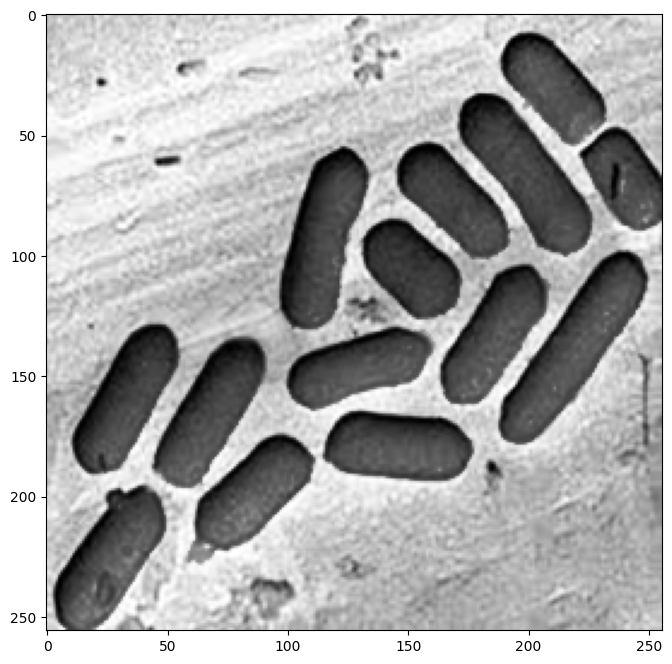

In [3]:
I = cv.imread("bacteria.png", cv.IMREAD_GRAYSCALE ) # Convert in grey scale

plt.figure( figsize=(8,8))
plt.imshow(I, cmap="gray")

## Problem: Count the number of bacteria in the image

(256, 256)


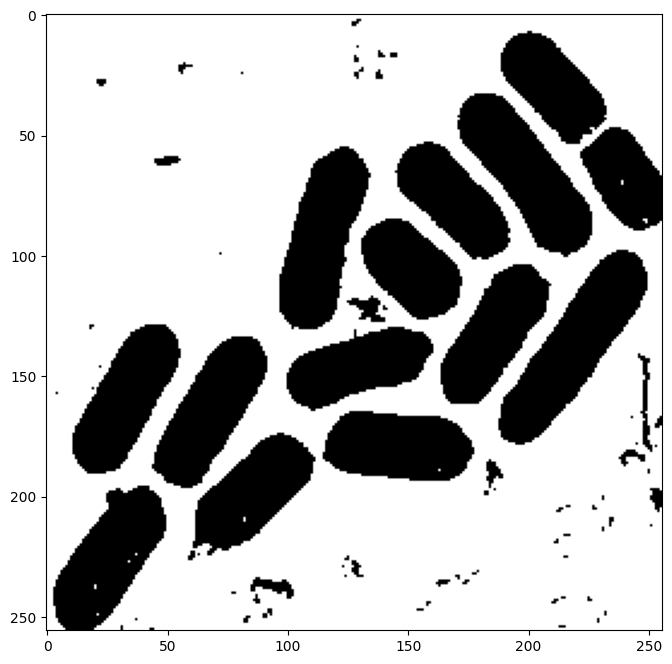

In [4]:
_, Ith = cv.threshold( I, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU )
print( Ith.shape )

plt.figure( figsize=(8,8))
plt.imshow(Ith.astype(np.uint8), cmap="gray")

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


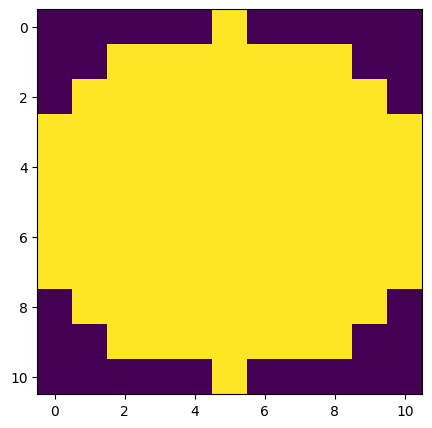

In [5]:
# Circle 11x11
se = cv.getStructuringElement(cv.MORPH_ELLIPSE,(11,11))
print(se)

plt.figure( figsize=(5,5))
plt.imshow(se)

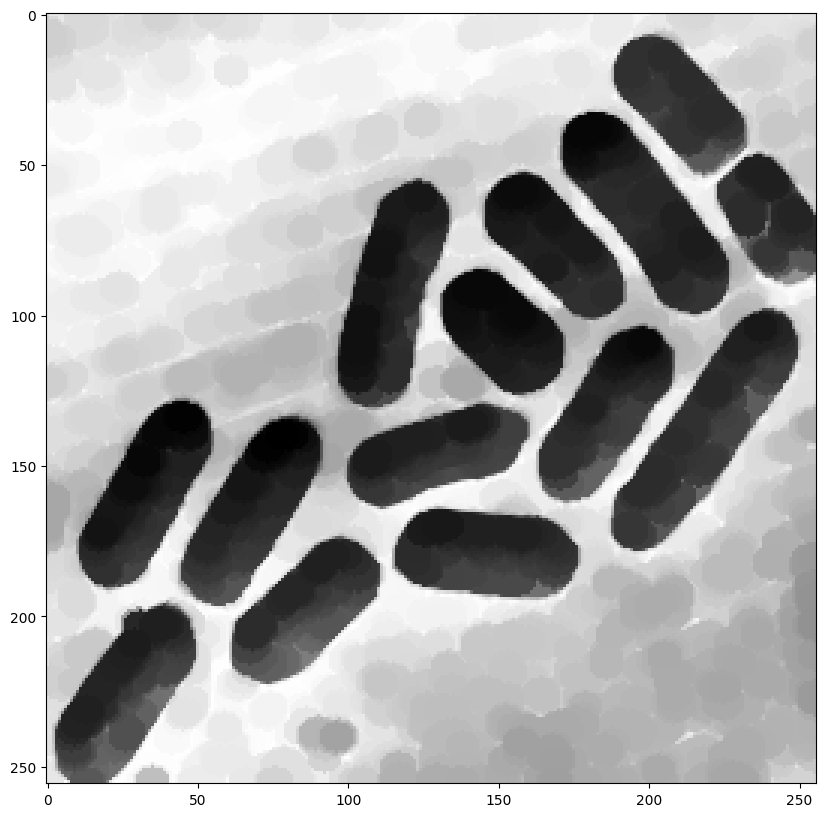

In [6]:
eroded = cv.morphologyEx(I, cv.MORPH_CLOSE, se)
# Use closing instead of opening since the image is inverted, but conceptually the operaton is an opening
# Closing = Dilataion followed by an Erosion

plt.figure( figsize=(10,10))
plt.imshow( eroded, cmap="gray")

(256, 256)


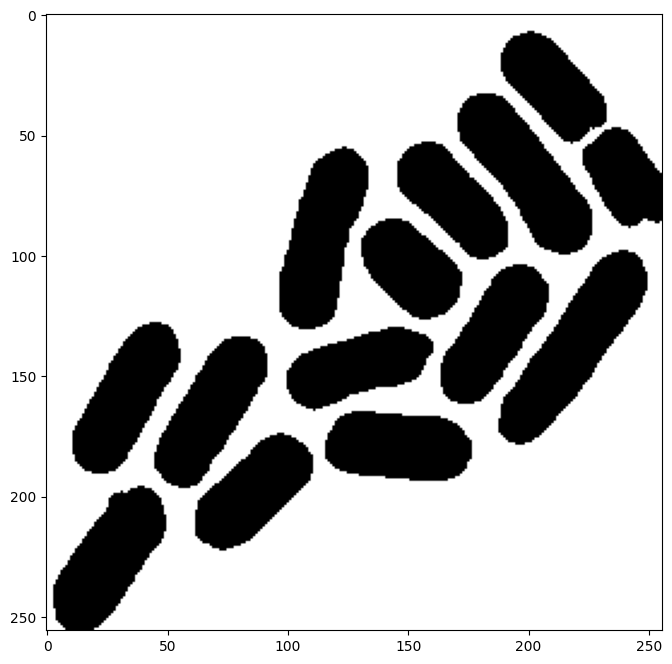

In [7]:
# An other threshold application 
_, Ith = cv.threshold( eroded, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU )
print( Ith.shape )

plt.figure( figsize=(8,8))
plt.imshow(Ith.astype(np.uint8), cmap="gray")


Number of connected components (bacteria): 14


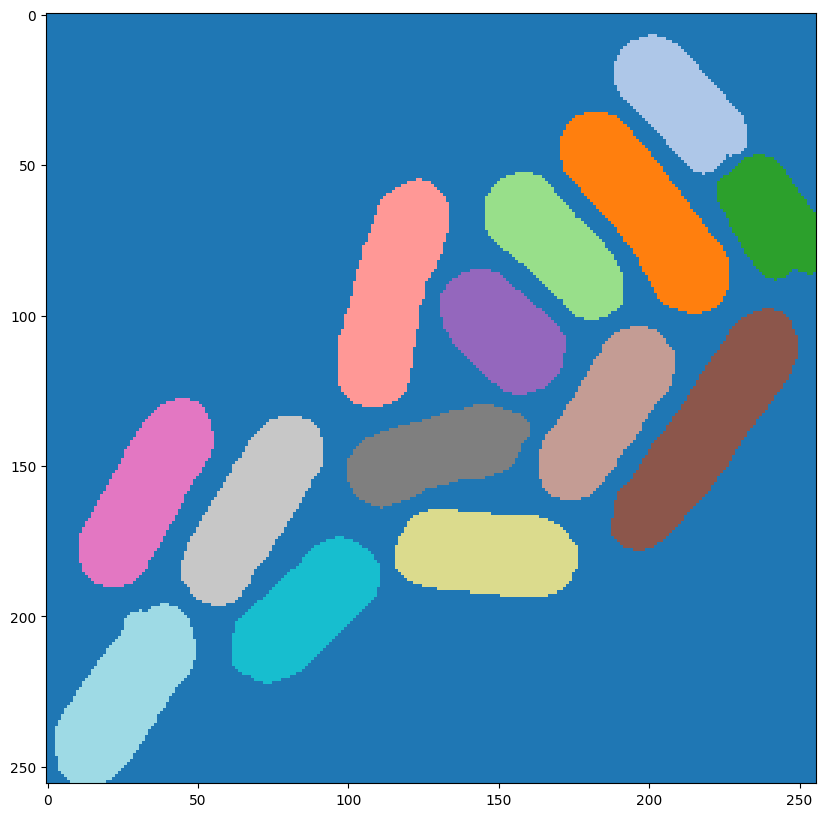

In [16]:
# num_labels -> number of components
# labels -> image in which every pixel contains the number of the class
# 255-Ith -> need components in white, that's why we invert
# Ith -> final thresholfd image

num_labels, labels = cv.connectedComponents(255-Ith)
print("Number of connected components (bacteria): %d"% (num_labels-1) )

plt.figure( figsize=(10,10))
plt.imshow( labels.astype(np.uint8), cmap="tab20", interpolation="none")